<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/%E9%82%8F%E8%BC%AF%E8%BF%B4%E6%AD%B8/multiclass_classification%E8%AA%AA%E6%98%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
%pip install wget mglearn

In [3]:
import wget

wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

'ChineseFont.ttf'

In [4]:
import matplotlib as mpl
from matplotlib.font_manager import fontManager
fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

### 多元線性分類說明
- 大多數的線性分類模型僅可以使用2元分類(`logistic regression除外`)
- 將二分類演算法擴展為多分類演算法的常用技術是`one-vs.-rest`方法
- 在「一對多」方法中，會為每個類別學習一個二元模型，該模型試圖將該類別與所有其他類別分開，從而產生與類別一樣多的二元模型。
- 為了做出預測，所有二元分類器都在測試點上運行。
- 在單一類別中得分最高的分類器，該類別標籤就是預測值。


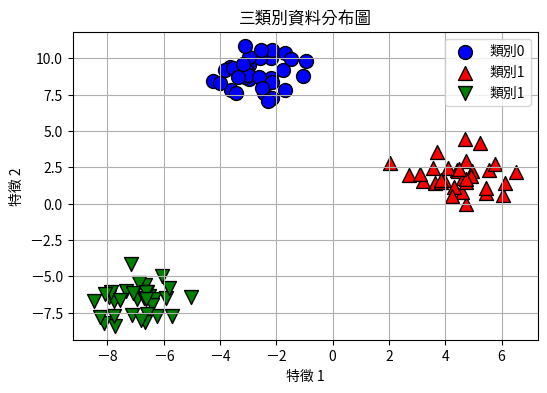

In [5]:
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import mglearn

#X的shape(100,2)
X, y= make_blobs(random_state=42)
mask0 = y == 0
mask1 = y == 1
mask2 = y == 2
plt.figure(figsize=(6,4))
plt.scatter(X[mask0][:,0], X[mask0][:,1],label="類別0",s=100,c='b',marker='o',edgecolors='k',linewidths=1)
plt.scatter(X[mask1][:,0], X[mask1][:,1],label="類別1",s=100,c='r',marker='^',edgecolors='k',linewidths=1)
plt.scatter(X[mask2][:,0], X[mask2][:,1],label="類別1",s=100,c='g',marker='v',edgecolors='k',linewidths=1)
plt.xlabel('特徵 1')
plt.ylabel('特徵 2')
plt.title('三類別資料分布圖')
plt.legend()
plt.grid(True)
plt.show()
#print(y)

In [6]:
#使用LinearSVC
linear_svm = LinearSVC().fit(X,y)
print("Coefficient shape:", linear_svm.coef_.shape)
print("Intercept shape:", linear_svm.intercept_.shape)

#有3個類型

Coefficient shape: (3, 2)
Intercept shape: (3,)


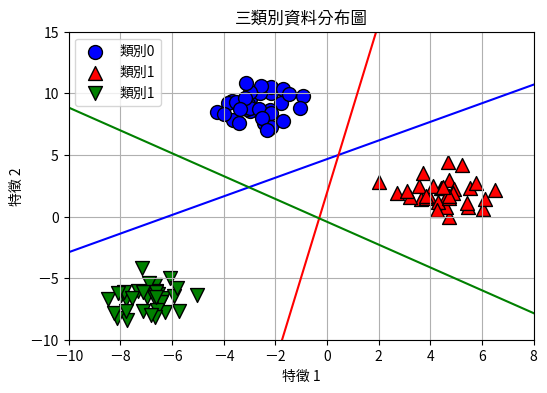

In [7]:
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import numpy as np
import mglearn

#X的shape(100,2)
X, y= make_blobs(random_state=42)
linear_svm = LinearSVC().fit(X, y)
mask0 = y == 0
mask1 = y == 1
mask2 = y == 2
plt.figure(figsize=(6,4))
plt.scatter(X[mask0][:,0], X[mask0][:,1],label="類別0",s=100,c='b',marker='o',edgecolors='k',linewidths=1)
plt.scatter(X[mask1][:,0], X[mask1][:,1],label="類別1",s=100,c='r',marker='^',edgecolors='k',linewidths=1)
plt.scatter(X[mask2][:,0], X[mask2][:,1],label="類別1",s=100,c='g',marker='v',edgecolors='k',linewidths=1)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line * coef[0] + intercept)/coef[1],c=color)
plt.xlabel('特徵 1')
plt.ylabel('特徵 2')
plt.title('三類別資料分布圖')
plt.legend()
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.grid(True)
plt.show()
#print(y)